 ### Trabajo Práctico - Matemática III
Para este trabajo se usó una base de datos que contiene la informacion de 1600 vinos. El objetivo principal es aplicar los conceptos que se vieron en clase y utilizar las librerías Pandas y Scikit-Learn para implementar una Red Neuronal que pueda determinar la calidad de un vino según sus características.


# Parte 1: Selección y Análisis de Base de Datos

In [1]:
import pandas as pd
#cargo los datos del DataSet
url = 'https://raw.githubusercontent.com/SRodriguezSpina/TP-RedNeuronal/main/Red%20Neuronal%20TP/winequality-red.csv'
df = pd.read_csv(url, delimiter=",",decimal=".",encoding="latin-1")
df.head(10)

,acidez fija,acidez volátil,ácido cítrico,azúcar residual,cloruros,dióxido de azufre,dióxido de azufre total,densidad,pH,sulfatos,alcohol,calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [2]:
df.tail(10)

,acidez fija,acidez volátil,ácido cítrico,azúcar residual,cloruros,dióxido de azufre,dióxido de azufre total,densidad,pH,sulfatos,alcohol,calidad
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [3]:
df.describe()

,acidez fija,acidez volátil,ácido cítrico,azúcar residual,cloruros,dióxido de azufre,dióxido de azufre total,densidad,pH,sulfatos,alcohol,calidad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


array([[<Axes: title={'center': 'acidez fija'}>,
        <Axes: title={'center': 'acidez volátil'}>,
        <Axes: title={'center': 'ácido cítrico'}>],
       [<Axes: title={'center': 'azúcar residual'}>,
        <Axes: title={'center': 'cloruros'}>,
        <Axes: title={'center': 'dióxido de azufre'}>],
       [<Axes: title={'center': 'dióxido de azufre total'}>,
        <Axes: title={'center': 'densidad'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulfatos'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'calidad'}>]], dtype=object)

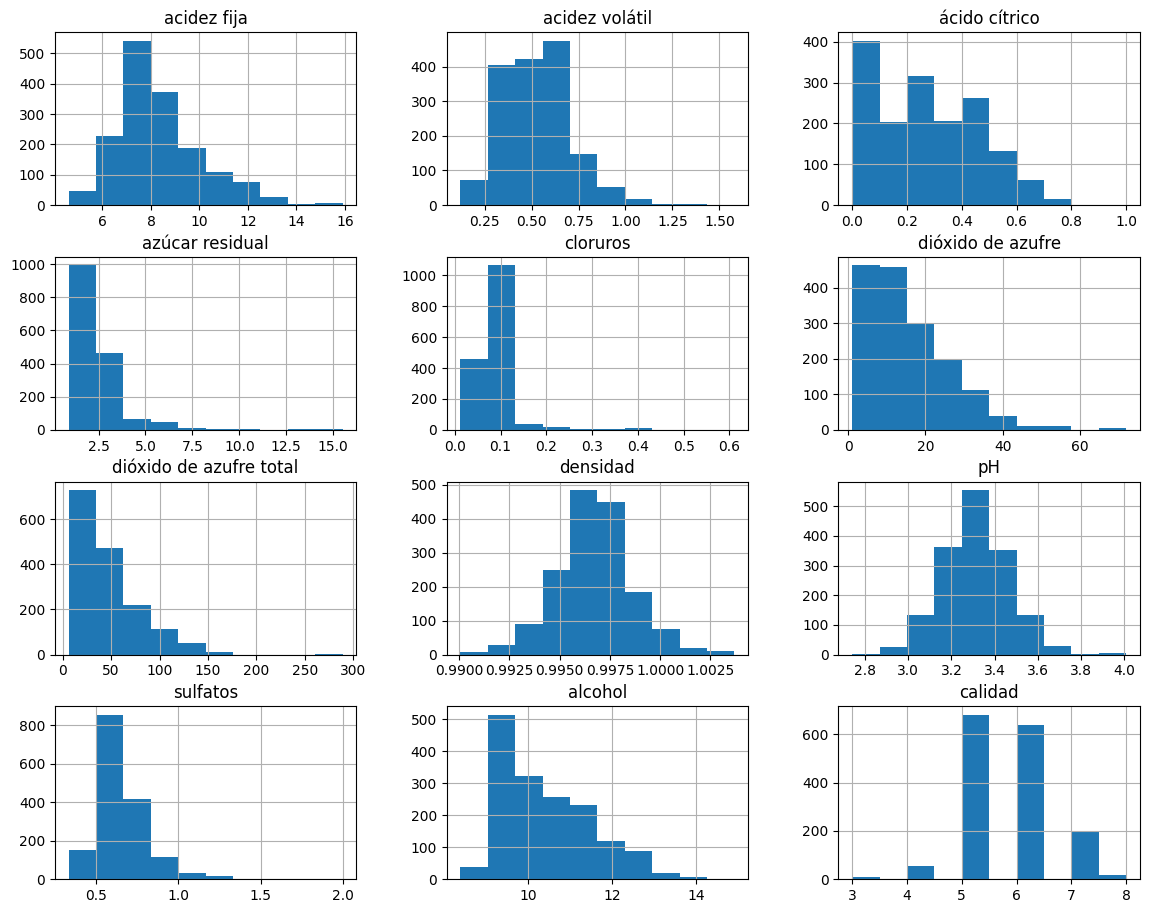

In [4]:
# Muestro histogramas de las variables de entrada para vizualizar valores atípicos
df.hist(figsize=(14, 11))

Observando los histogramas puedo notar cuales de las variables tienen valores atípicos, sin contar la calidad que es nuestra salida.

En "Dióxido de Azufre total", "Dióxido de Azufre", "Azúcar residual" y "Cloruros" hay de estos valoes, a continuación los contamos. El resto de las variables presentan distribuciones normales.

In [5]:
import numpy as np

# Se seleccionan solo las columnas donde fueron vistos valores atípicos
columnas_atipic = ['dióxido de azufre total', 'dióxido de azufre', 'cloruros', 'azúcar residual']

# Calcular el rango intercuartílico (IQR) para cada columna numérica
Q1 = df[columnas_atipic].quantile(0.25)
Q3 = df[columnas_atipic].quantile(0.75)
IQR = Q3 - Q1

# Identificar valores atípicos utilizando el criterio del IQR
outliers = ((df[columnas_atipic] < (Q1 - 1.5 * IQR)) | (df[columnas_atipic] > (Q3 + 1.5 * IQR))).any(axis=1)

# Contar el número de valores atípicos por cada fila de las variables seleccionadas
num_outliers = outliers.sum()
print("Filas con Valores Atípicos:", num_outliers)

Filas con Valores Atípicos: 302


178 son las filas con valores atípicos que corresponden a las variables "Dióxido de Azufre total", "Dióxido de Azufre" y "Cloruros".

Estos valores atípicos no fueron descartados del dataframe.

In [6]:
# Calcular la mediana de cada columna
medians = df.median()

# Mostrar las medianas de las variables numéricas
print("\n\tMediana de Variables Numéricas:\n", medians)


	Mediana de Variables Numéricas:
 acidez fija                 7.90000
acidez volátil              0.52000
ácido cítrico               0.26000
azúcar residual             2.20000
cloruros                    0.07900
dióxido de azufre          14.00000
dióxido de azufre total    38.00000
densidad                    0.99675
pH                          3.31000
sulfatos                    0.62000
alcohol                    10.20000
calidad                     6.00000
dtype: float64


Se normalizan los datos utilizando la media de cada columna y su desviación estándar.

In [7]:
df_stats = df.describe().T
df_n = (df - df_stats['mean']) / df_stats['std']  # Para normalizar: (valor - promedio) / desv_estandar
df_n.describe()

,acidez fija,acidez volátil,ácido cítrico,azúcar residual,cloruros,dióxido de azufre,dióxido de azufre total,densidad,pH,sulfatos,alcohol,calidad
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.554936e-16,1.688594e-16,-1.066481e-16,-1.110917e-16,2.132961e-16,-6.221137e-17,2.666202e-17,-3.469617e-14,2.861723e-15,6.665504e-16,7.109871e-17,6.221137e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.136377e+00,-2.277567e+00,-1.391037e+00,-1.162333e+00,-1.603443e+00,-1.422055e+00,-1.230199e+00,-3.537625e+00,-3.699244e+00,-1.935902e+00,-1.898325e+00,-3.264143e+00
25%,-7.004996e-01,-7.696903e-01,-9.290275e-01,-4.530767e-01,-3.711129e-01,-8.484502e-01,-7.438076e-01,-6.075656e-01,-6.549356e-01,-6.380200e-01,-8.661079e-01,-7.875763e-01
50%,-2.410190e-01,-4.367545e-02,-5.634264e-02,-2.402999e-01,-1.798892e-01,-1.792441e-01,-2.574163e-01,1.759533e-03,-7.210449e-03,-2.250577e-01,-2.092427e-01,4.507074e-01
75%,5.056370e-01,6.264921e-01,7.650078e-01,4.340257e-02,5.382858e-02,4.899619e-01,4.721707e-01,5.766445e-01,5.757422e-01,4.238832e-01,6.352984e-01,4.507074e-01
max,4.353787e+00,5.876138e+00,3.742403e+00,9.192806e+00,1.112355e+01,5.365606e+00,7.372847e+00,3.678904e+00,4.526866e+00,7.916200e+00,4.201138e+00,2.927275e+00


### Correlaciones
reviso las correlaciones del DataFrame normalizado

In [8]:
correlaciones = df_n.corr(method="pearson")
#tabla
correlaciones

,acidez fija,acidez volátil,ácido cítrico,azúcar residual,cloruros,dióxido de azufre,dióxido de azufre total,densidad,pH,sulfatos,alcohol,calidad
acidez fija,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
acidez volátil,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
ácido cítrico,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
azúcar residual,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
cloruros,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
dióxido de azufre,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
dióxido de azufre total,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
densidad,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulfatos,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


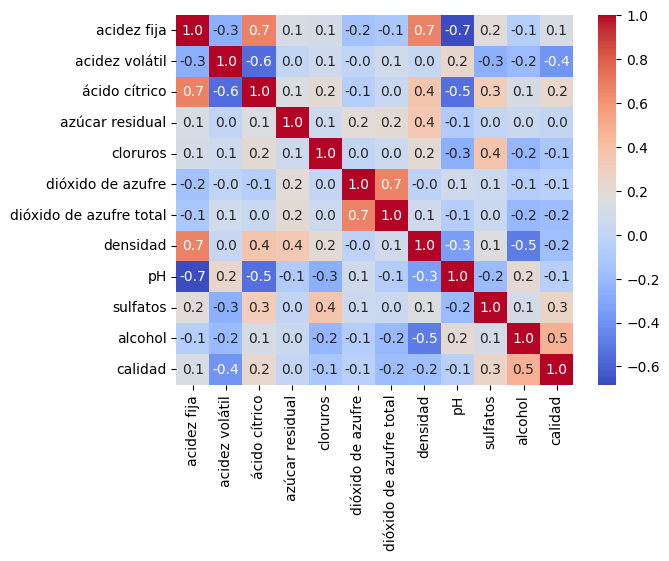

In [9]:
# mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlaciones, cmap='coolwarm', annot=True, fmt=".1f")
plt.show()

Dentro de todo las variables presentan correlación con la calidad del vino. Aquellas que mas relación tienen son la acidez volátil, los sulfatos y el alcohol.

Acidez volátil: su presencia en niveles bajos es normal y contribuye a la complejidad del vino, pero en niveles altos puede ser un signo de deterioro o mala calidad, dando lugar a sabores y aromas desagradables.

Sulfatos: Los sulfatos en el vino, actúan como conservantes, protegiendo el vino contra bacterias y levaduras indeseadas que pueden causar deterioro. y Antioxidantes, previniendo la oxidación del vino, manteniendo su frescura y evitando cambios no deseados en el color y sabor.

Alcohol: Se produce durante la fermentación cuando las levaduras transforman los azúcares presentes en el jugo de uva.

# Parte 2: Desarrollo de la Red Neuronal

Para comenzar, preparo los datos:

- Features contiene el nombre de las columnas que me importan, que a su vez son las variables de entrada.
- Defino 'X' como los datos que corresponden a las variables de entrada, y a 'Y' como los valores de salida.
- Divido el conjunto de datos en otros dos conjuntos, para el entrenamiento y prueba de la red.
- Modifico los valores 'Y' (entrenamiento y prueba), para que sean unos o ceros. Los 1's reflejan aquellas calidades que se encuentran por encima del promedio de las calidades, los 0's aquellas que se encuentran por debajo.

In [10]:
# Se consideran los datos que me interesan para la Fordward Propagation

from sklearn.model_selection import train_test_split

features = ['acidez fija', 'acidez volátil', 'ácido cítrico', 'azúcar residual', 'cloruros', 'dióxido de azufre', 'dióxido de azufre total', 'densidad',
            'pH', 'sulfatos', 'alcohol']

X = df_n[features].values
Y = df_n['calidad'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

# Convertir a binario usando el umbral 0
Y_train_binary = (Y_train >= 0.0).astype(int)
Y_test_binary = (Y_test >= 0.0).astype(int)

# Verifico los valores binarios con un for y recorro Y_test_binary
#for i, value in enumerate(Y_test_binary):
#    print(f'Índice {i}: Valor {value}')

En esta red implementé una sola capa oculta de 11 neuronas, una taza de aprendizaje de L = 0.005 y 12000 iteraciones en el descenso de gradiente.

Hago uso de las funciones de acticación ReLU y Logistic.

Se utiliza el método de Descenso de Gradiente Estocástico (SGD) para el entrenamiento de la Red.

In [11]:
from tqdm.auto import tqdm

np.random.seed(0)

# Número de registros de entrenamiento
n_train = X_train.shape[0]
print(f'{n_train=}')
n_test = X_test.shape[0]
print(f'{n_test=}')
# Inicializar los pesos y sesgos de la red neuronal
w_hidden = np.random.rand(11, 11) * 2 - 1
w_output = np.random.rand(1, 11) * 2 - 1

b_hidden = np.random.rand(11, 1) * 2 - 1
b_output = np.random.rand(1, 1) * 2 - 1

print(np.random.rand(1))

# Funciones de activacion (Leaky ReLU y Logistic)
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# Funcion que corre la red neuronal con los datos de entrada para predecir la salida
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

# Calculo de precisión #
test_predictions = forward_prop(X_test.transpose())[3] # me interesa solo la capa de salida, A2
test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), np.array(Y_test >= 0).astype(int))
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])
print("ACCURACY pre-training: ", accuracy)

# Se realiza el descenso de gradiente y calculo la red entrenada

L = 0.005  # La tasa de aprendizaje

# Derivadas de las funciones de activación
d_relu = lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

# Devuelve pendientes para pesos y sesgos
# uso de regla de la cadena
def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = d_logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = d_relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

loss_train_l = []
loss_test_l = []
accuracy_test_l = []
accuracy_train_l = []

num_samples = 1
# Ejecutar descenso de gradiente
for i in tqdm(range(20000), ncols=200, leave=True):
    # seleccionar aleatoriamente un conjunto de datos de entrenamiento
    idx = np.random.choice(n_train, num_samples, replace=False)
    X_samp_train = X_train[idx].transpose()
    Y_samp_train = Y_train_binary[idx]
    idx = np.random.choice(n_test, num_samples, replace=False)
    X_samp_test = X_test[idx].transpose()
    Y_samp_test = Y_test_binary[idx]

    # pasar datos seleccionados aleatoriamente a través de la red neuronal
    Z1_train, A1_train, Z2_train, A2_train = forward_prop(X_samp_train)
    loss_train = np.mean(np.square(A2_train - Y_samp_train))
    loss_train_l += [loss_train]

    _, _, _, A2_test = forward_prop(X_samp_test)
    loss_test = np.mean(np.square(A2_test - Y_samp_test))
    loss_test_l += [loss_test]

    # distribuir error a través de la retropropagación
    # y devolver pendientes para pesos y sesgos
    dW1, dB1, dW2, dB2 = backward_prop(Z1_train, A1_train, Z2_train, A2_train, X_samp_train, Y_samp_train)

    # actualizar pesos y sesgos
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2

    # Cálculo de precisión en el conjunto de prueba
    test_predictions = forward_prop(X_test.transpose())[3]  # me interesa solo la capa de salida, A2
    test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), np.array(Y_test_binary)) #si se cumple la condicion y Y_TEST_BINARY es igual: guarda 1, sino 0
    accuracy_test = sum(test_comparisons.astype(int) / X_test.shape[0])   #divido todas las predicciones por la cantidad de X_TEST, dando el resultado de precision
    accuracy_test_l.append(accuracy_test)

    # Cálculo de precisión en el conjunto de entrenamiento
    test_predictions = forward_prop(X_train.transpose())[3]  # me interesa solo la capa de salida, A2
    test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), np.array(Y_train_binary))
    accuracy_train = sum(test_comparisons.astype(int) / X_train.shape[0])
    accuracy_train_l.append(accuracy_train)


print("X_test ACCURACY post-training: ", accuracy_test)
print("X_train ACCURACY post-training: ", accuracy_train)


n_train=1066
n_test=533
[0.80619399]
ACCURACY pre-training:  0.6003752345215781


  0%|                                                                                                         …

X_test ACCURACY post-training:  0.7636022514071362
X_train ACCURACY post-training:  0.7457786116322838


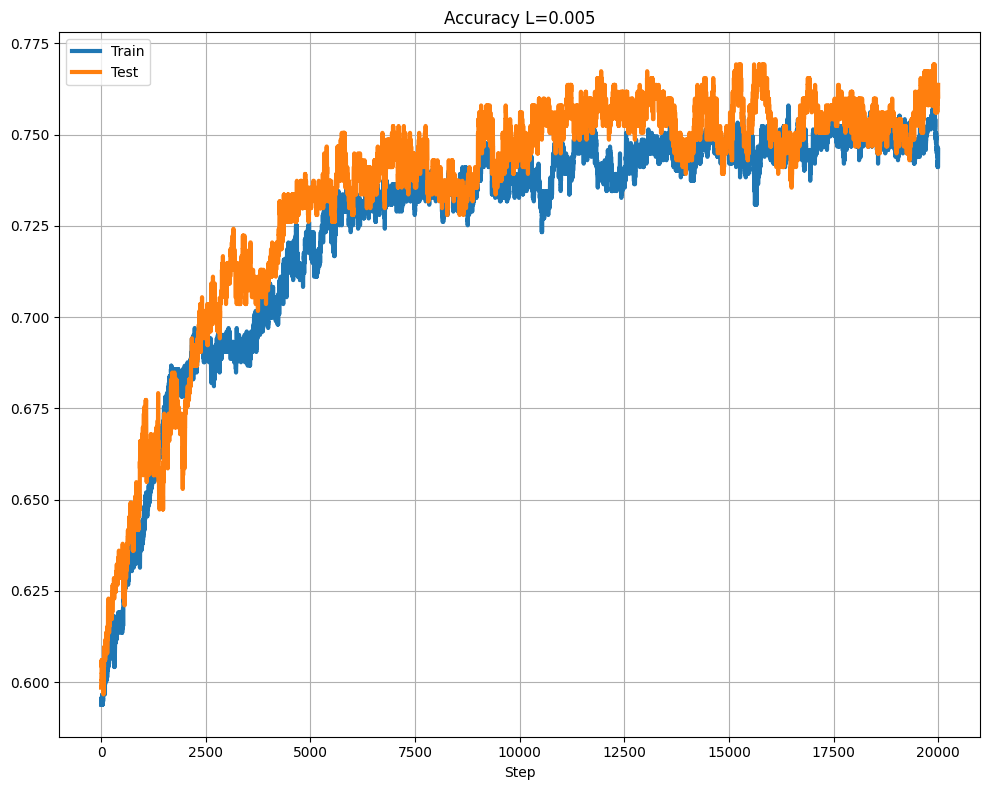

In [12]:
import matplotlib.pyplot as plt

fmt_train = {
    'color': 'tab:blue',
    'ls': 'solid',
    'lw': 3,
}
fmt_test = {
    'color': 'tab:orange',
    'ls': 'solid',
    'lw': 3,
}

fig, (ax) = plt.subplots(1,1,figsize=(10,8))

ax.plot(accuracy_train_l, label='Train', **fmt_train)
ax.plot(accuracy_test_l, label='Test', **fmt_test)

# bx.plot(accs_train, label='Train', **fmt_train)
# bx.plot(accs_test, label='Test', **fmt_test)

# bx.set_ylim(-0.01, 1.01)

ax.grid(which='both')
# bx.grid(which='both')

ax.legend()
# bx.legend()

ax.set_title(f'Accuracy {L=}')
# bx.set_title('Classifier Accuracy')

ax.set_xlabel('Step')
# bx.set_xlabel('Step')

fig.tight_layout()
plt.show()


In [13]:
import matplotlib as plt

def graficar_accuracy(L, train_l, test_l) -> None:
    iters = len(test_l)

    fmt_train = {
        'color': 'tab:blue',
        'ls': 'solid',
        'lw': 3,
    }
    fmt_test = {
        'color': 'tab:orange',
        'ls': 'solid',
        'lw': 3,
    }

    fig, (ax) = plt.subplots(1, 1, figsize=(10, 8))

    ax.plot(train_l, label= 'Train', **fmt_train)
    ax.plot(test_l, label= 'Test', **fmt_test)

    ax.grid(which= 'both')
    ax.legend()
    ax.set_title(f'Acuracy {L=}')
    ax.set_xlabel('Step')

    fig.tight_layout()
    plt.savefig(f'accuracy_{L=}_{iters}.png')


In [14]:
import matplotlib.pyplot as plt
def mi_red_neuronal(L, iters) -> None:

    np.random.seed(0)

    # Número de registros de entrenamiento
    n_train = X_train.shape[0]
    print(f'{n_train=}')
    n_test = X_test.shape[0]
    print(f'{n_test=}')
    # Inicializar los pesos y sesgos de la red neuronal
    w_hidden = np.random.rand(11, 11) * 2 - 1
    w_output = np.random.rand(1, 11) * 2 - 1

    b_hidden = np.random.rand(11, 1) * 2 - 1
    b_output = np.random.rand(1, 1) * 2 - 1

    print(np.random.rand(1))

    # Funciones de activacion (Leaky ReLU y Logistic)
    relu = lambda x: np.maximum(x, 0)
    logistic = lambda x: 1 / (1 + np.exp(-x))

    # Funcion que corre la red neuronal con los datos de entrada para predecir la salida
    def forward_prop(X):
        Z1 = w_hidden @ X + b_hidden
        A1 = relu(Z1)
        Z2 = w_output @ A1 + b_output
        A2 = logistic(Z2)
        return Z1, A1, Z2, A2

    # Calculo de precisión
    test_predictions = forward_prop(X_test.transpose())[3] # me interesa solo la capa de salida, A2
    test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), np.array(Y_test >= 0).astype(int))
    accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])



    # Se realiza el descenso de gradiente y calculo la red entrenada


    # Derivadas de las funciones de activación
    d_relu = lambda x: x > 0
    d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

# Devuelve pendientes para pesos y sesgos
# uso de regla de la cadena
    def backward_prop(Z1, A1, Z2, A2, X, Y):
        dC_dA2 = 2 * A2 - 2 * Y
        dA2_dZ2 = d_logistic(Z2)
        dZ2_dA1 = w_output
        dZ2_dW2 = A1
        dZ2_dB2 = 1
        dA1_dZ1 = d_relu(Z1)
        dZ1_dW1 = X
        dZ1_dB1 = 1

        dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

        dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

        dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

        dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

        dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

        return dC_dW1, dC_dB1, dC_dW2, dC_dB2

    loss_train_l = []
    loss_test_l = []
    accuracy_test_l = []
    accuracy_train_l = []

    num_samples = 1
    # Ejecutar descenso de gradiente
    for i in tqdm(range(iters)):
        # seleccionar aleatoriamente un conjunto de datos de entrenamiento
        idx = np.random.choice(n_train, num_samples, replace=False)
        X_samp_train = X_train[idx].transpose()
        Y_samp_train = Y_train[idx]
        idx = np.random.choice(n_test, num_samples, replace=False)
        X_samp_test = X_test[idx].transpose()
        Y_samp_test = Y_test[idx]

        # pasar datos seleccionados aleatoriamente a través de la red neuronal
        Z1_train, A1_train, Z2_train, A2_train = forward_prop(X_samp_train)
        loss_train = np.mean(np.square(A2_train - Y_samp_train))
        loss_train_l += [loss_train]

        _, _, _, A2_test = forward_prop(X_samp_test)
        loss_test = np.mean(np.square(A2_test - Y_samp_test))
        loss_test_l += [loss_test]

        # distribuir error a través de la retropropagación
        # y devolver pendientes para pesos y sesgos
        dW1, dB1, dW2, dB2 = backward_prop(Z1_train, A1_train, Z2_train, A2_train, X_samp_train, Y_samp_train)

        # actualizar pesos y sesgos
        w_hidden -= L * dW1
        b_hidden -= L * dB1
        w_output -= L * dW2
        b_output -= L * dB2

        # Cálculo de precisión en el conjunto de prueba
        test_predictions = forward_prop(X_test.transpose())[3]  # me interesa solo la capa de salida, A2
        test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), np.array(Y_test_binary))
        accuracy_test = sum(test_comparisons.astype(int) / X_test.shape[0])
        accuracy_test_l.append(accuracy_test)

        # Cálculo de precisión en el conjunto de entrenamiento
        test_predictions = forward_prop(X_train.transpose())[3]  # me interesa solo la capa de salida, A2
        test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), np.array(Y_train_binary))
        accuracy_train = sum(test_comparisons.astype(int) / X_train.shape[0])
        accuracy_train_l.append(accuracy_train)

    graficar_accuracy( L=L, train_l= accuracy_train_l, test_l= accuracy_test_l)

n_train=1066
n_test=533
[0.80619399]


  0%|          | 0/300 [00:00<?, ?it/s]

n_train=1066
n_test=533
[0.80619399]


  0%|          | 0/300 [00:00<?, ?it/s]

n_train=1066
n_test=533
[0.80619399]


  0%|          | 0/300 [00:00<?, ?it/s]

n_train=1066
n_test=533
[0.80619399]


  0%|          | 0/300 [00:00<?, ?it/s]

n_train=1066
n_test=533
[0.80619399]


  0%|          | 0/3000 [00:00<?, ?it/s]

n_train=1066
n_test=533
[0.80619399]


  0%|          | 0/3000 [00:00<?, ?it/s]

n_train=1066
n_test=533
[0.80619399]


  0%|          | 0/3000 [00:00<?, ?it/s]

n_train=1066
n_test=533
[0.80619399]


  0%|          | 0/3000 [00:00<?, ?it/s]

n_train=1066
n_test=533
[0.80619399]


  0%|          | 0/10000 [00:00<?, ?it/s]

n_train=1066
n_test=533
[0.80619399]


  0%|          | 0/10000 [00:00<?, ?it/s]

n_train=1066
n_test=533
[0.80619399]


  0%|          | 0/10000 [00:00<?, ?it/s]

n_train=1066
n_test=533
[0.80619399]


  0%|          | 0/10000 [00:00<?, ?it/s]

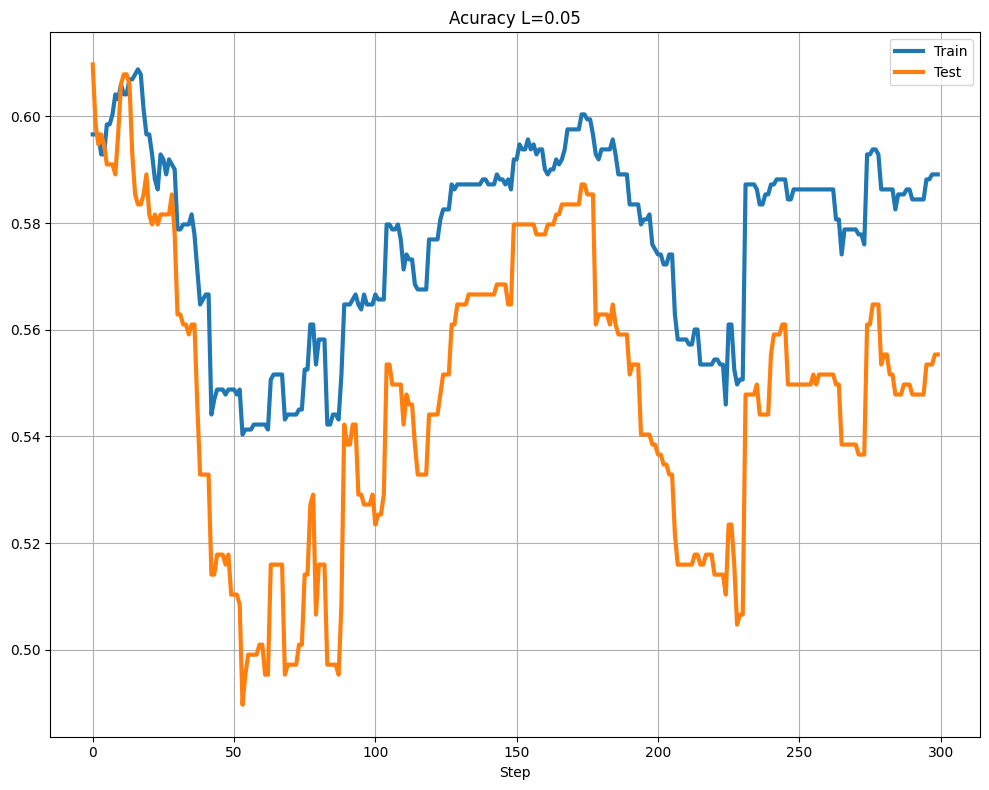

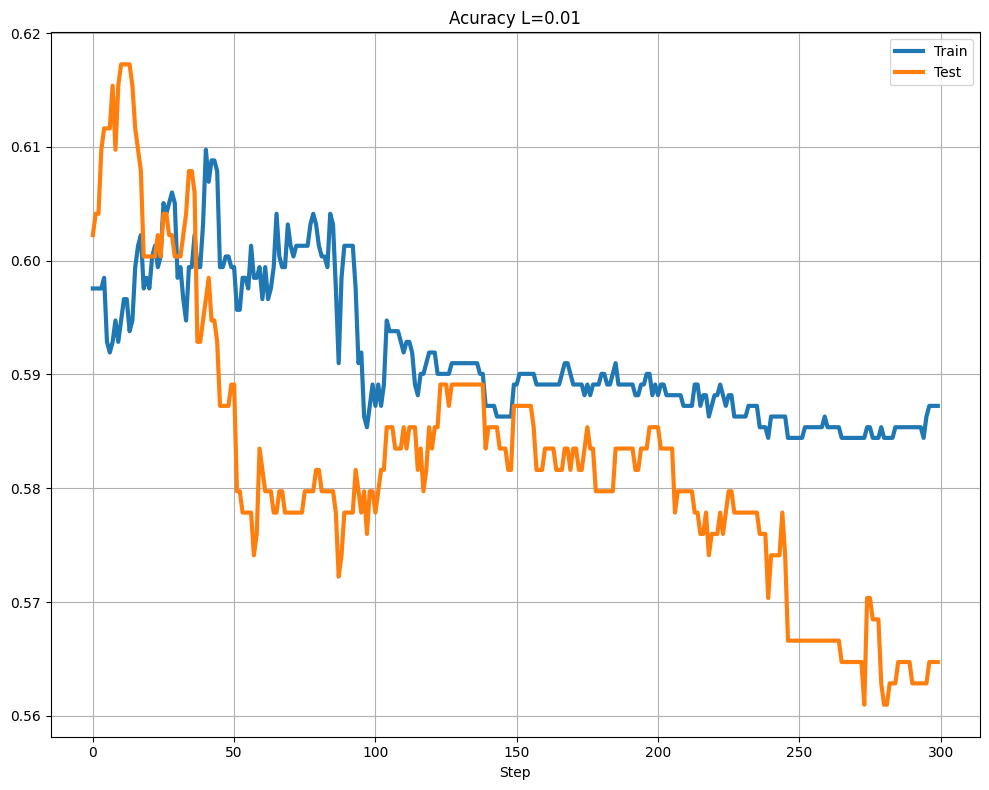

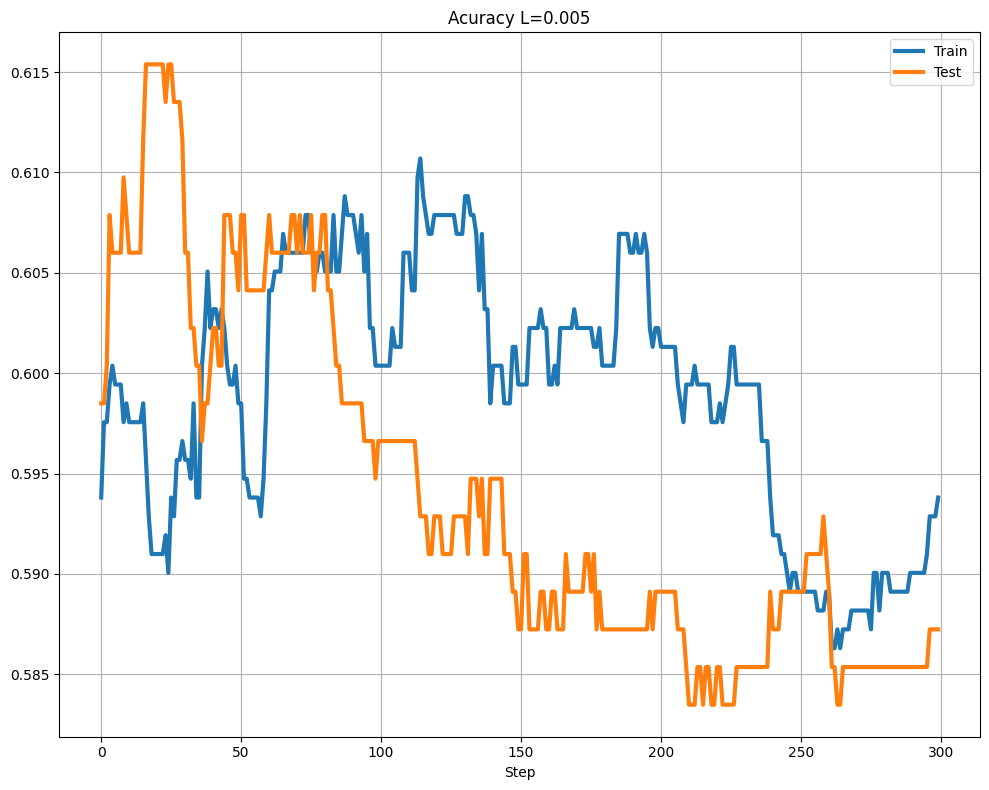

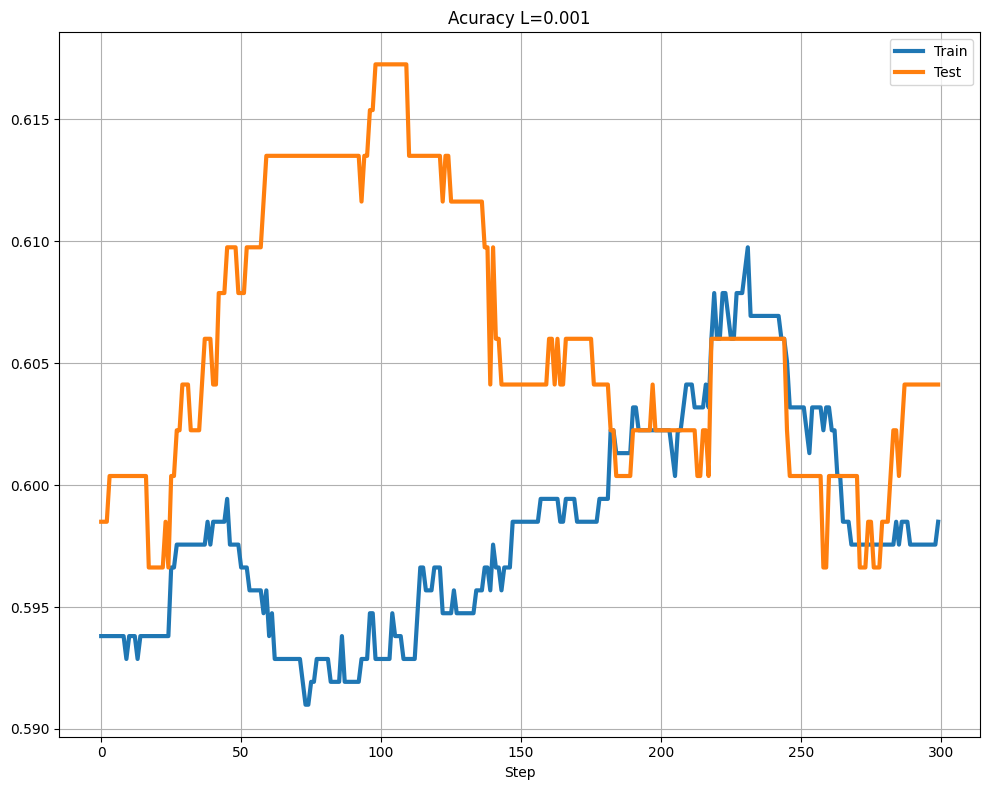

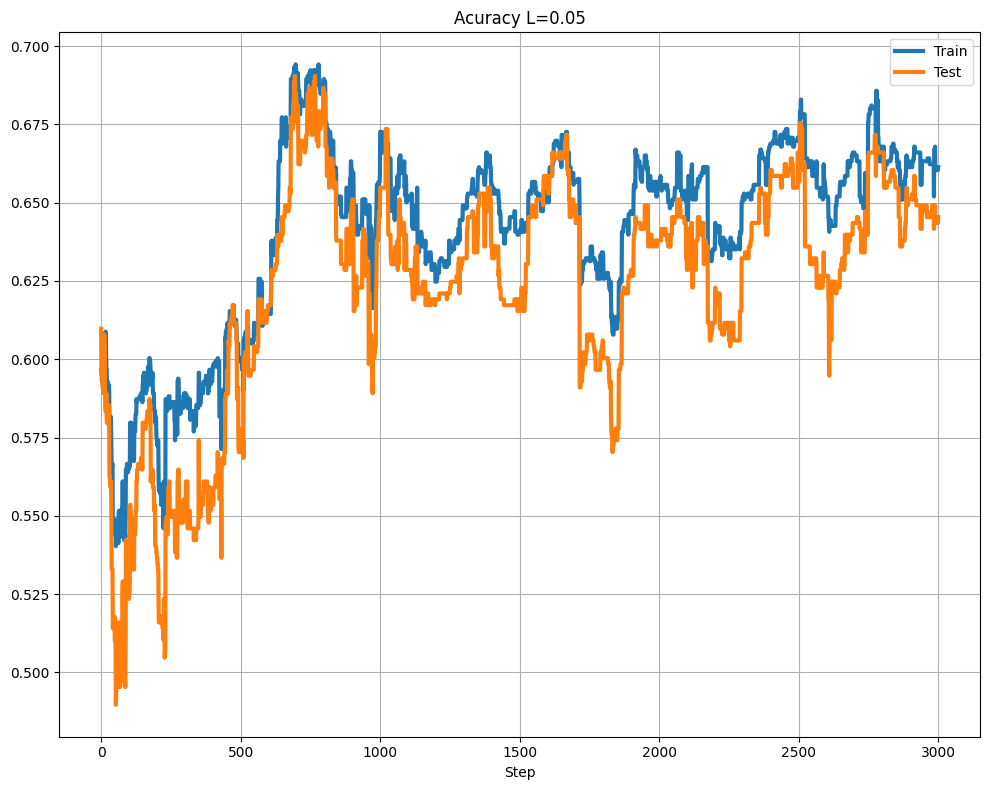

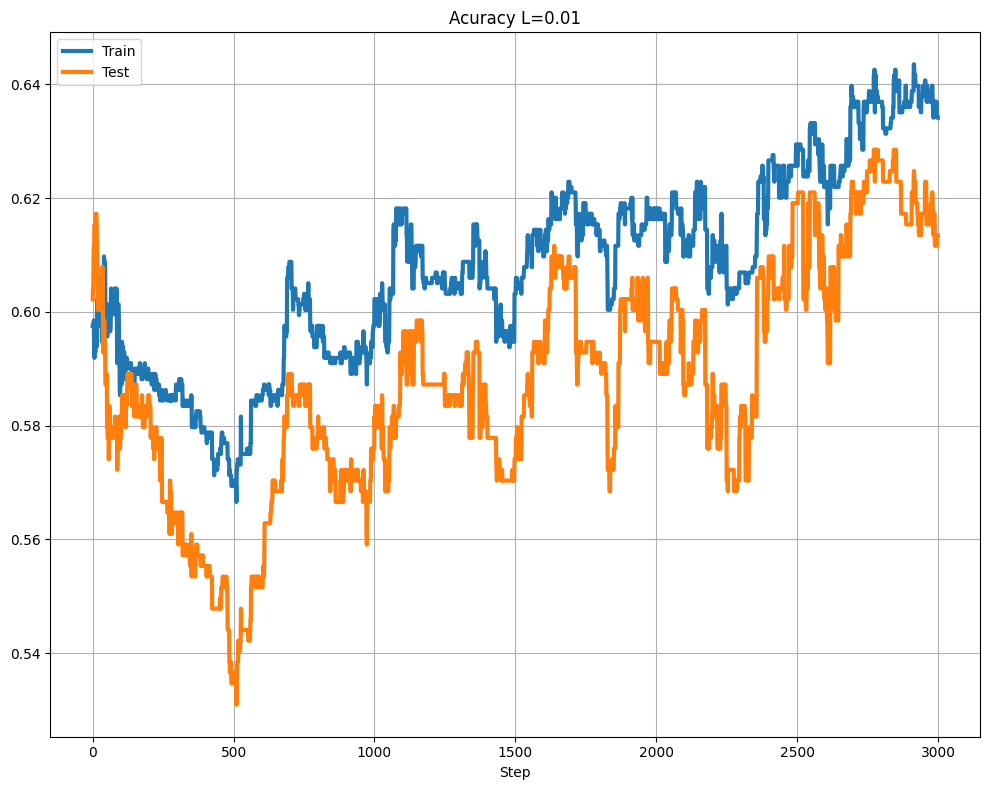

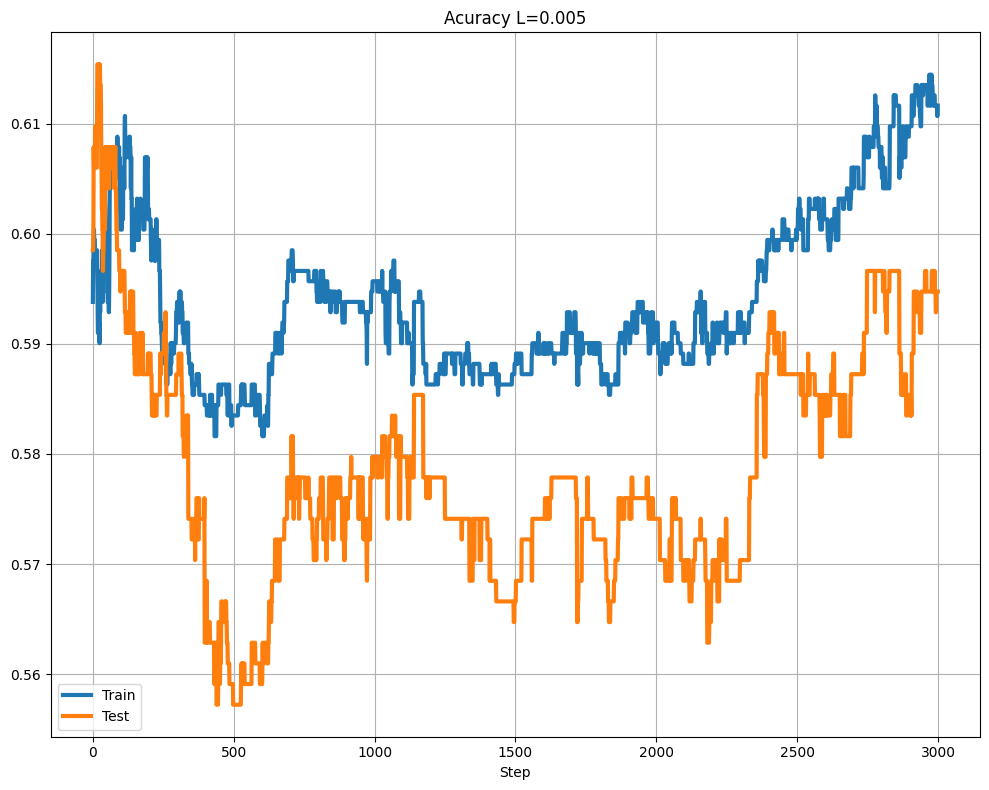

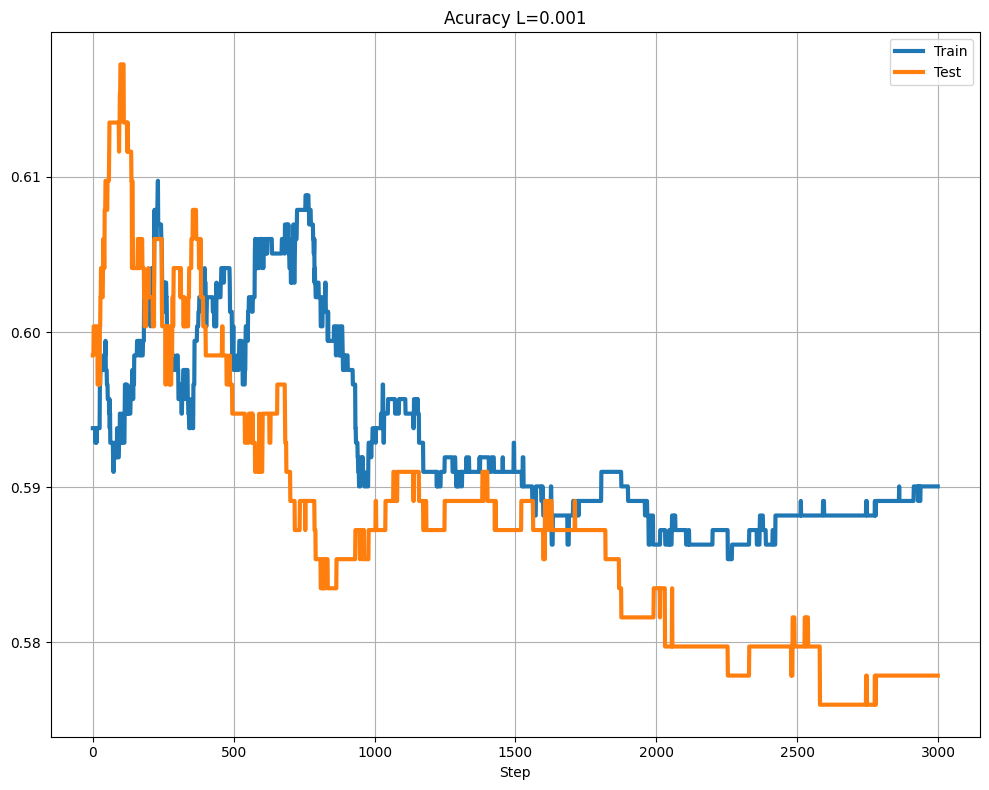

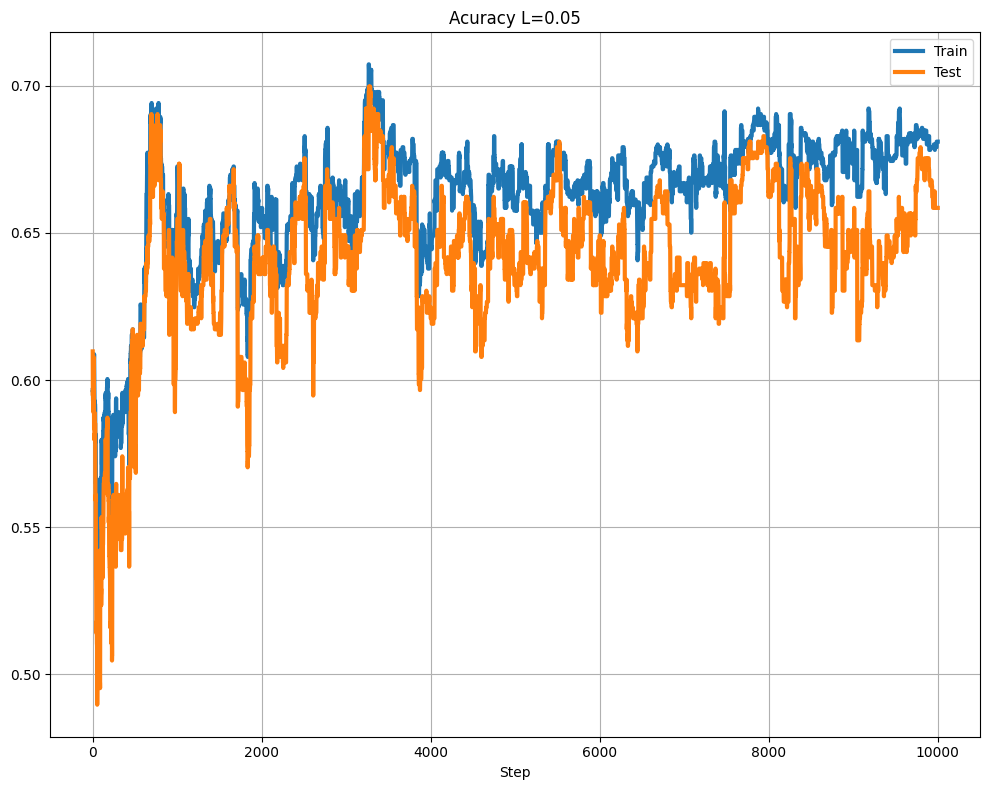

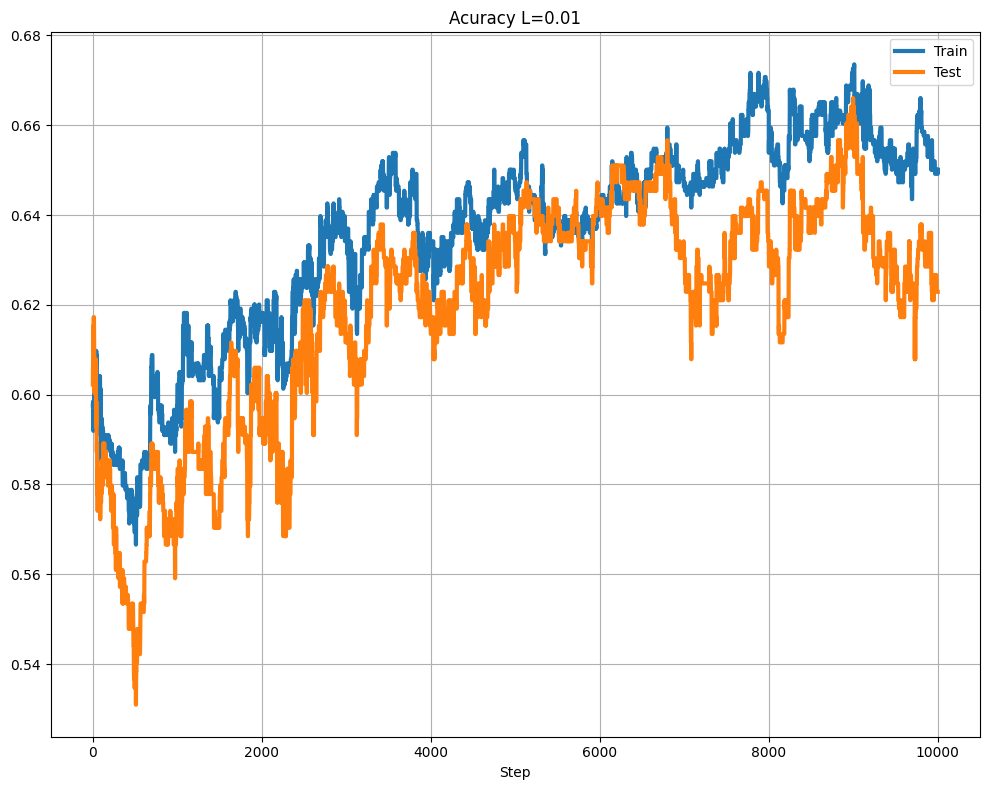

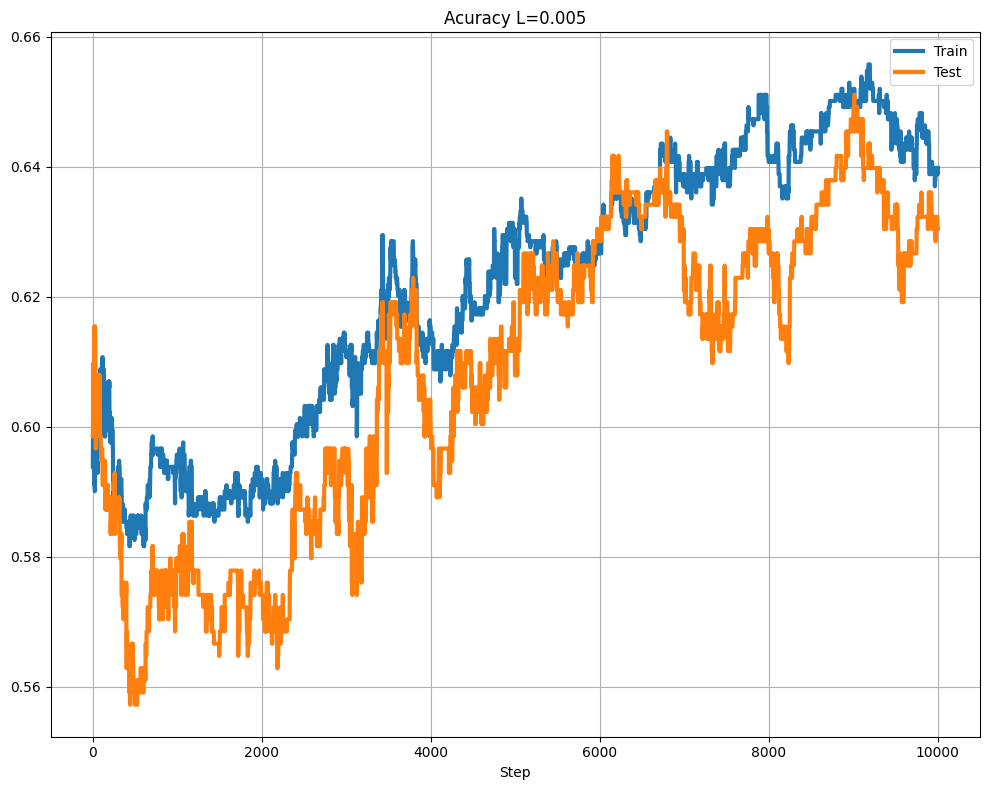

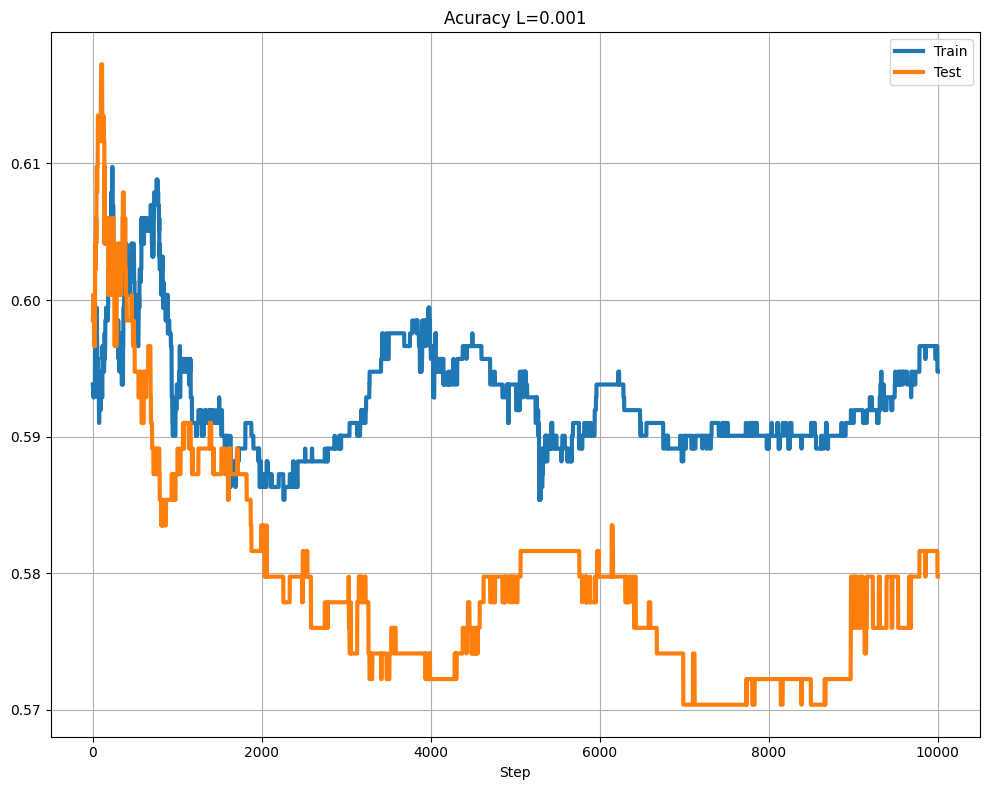

In [15]:
iters_l = [300, 3000, 10000]
L_l = [0.05, 0.01, 0.005, 0.001]
for iter in iters_l:
    for L in L_l:
        mi_red_neuronal(L= L, iters= iter)

Hago una prueba de la Red obteniendo 6 filas aleatorias del DataFrame Normalizado

In [16]:
etiquetas = ['acidez fija', 'acidez volátil', 'ácido cítrico', 'azúcar residual', 'cloruros', 'dióxido de azufre',
              'dióxido de azufre total', 'densidad', 'pH', 'sulfatos', 'alcohol', 'calidad']
filas_aleatorias = df_n[etiquetas].sample(n=6)  # Obtener 6 filas aleatorias solo para las columnas especificadas en 'data'
filas_aleatorias2 = filas_aleatorias.loc[:, filas_aleatorias.columns[:-1]]
filas_aleatorias

,acidez fija,acidez volátil,ácido cítrico,azúcar residual,cloruros,dióxido de azufre,dióxido de azufre total,densidad,pH,sulfatos,alcohol,calidad
281,-0.355889,-1.439858,2.099702,0.681733,5.748045,-1.039652,-1.108601,0.240191,-0.395846,2.488695,-0.490756,1.688991
819,0.448202,0.738187,-0.621021,0.468956,0.202558,-0.657248,0.380972,1.596602,-0.201528,-0.697015,-0.772270,-0.787576
357,1.252293,-0.602148,1.997033,0.291642,0.606253,-0.370446,-0.531011,0.134222,-0.460618,0.541872,1.198326,1.688991
481,0.620507,-1.272316,1.483689,0.185254,-0.158642,-0.944051,-0.895805,-0.183687,-1.043571,1.544781,1.198326,2.927275
1186,-0.987675,1.520049,-1.237034,3.731534,-0.179889,-0.944051,-1.047802,-0.236672,1.353012,-0.932993,1.667515,-0.787576
1088,1.884079,-0.657996,1.381021,-0.736779,0.160064,0.585563,-0.166218,0.319668,-1.885613,0.600867,-0.490756,1.688991


In [17]:
filas_aleatorias2

,acidez fija,acidez volátil,ácido cítrico,azúcar residual,cloruros,dióxido de azufre,dióxido de azufre total,densidad,pH,sulfatos,alcohol
281,-0.355889,-1.439858,2.099702,0.681733,5.748045,-1.039652,-1.108601,0.240191,-0.395846,2.488695,-0.490756
819,0.448202,0.738187,-0.621021,0.468956,0.202558,-0.657248,0.380972,1.596602,-0.201528,-0.697015,-0.772270
357,1.252293,-0.602148,1.997033,0.291642,0.606253,-0.370446,-0.531011,0.134222,-0.460618,0.541872,1.198326
481,0.620507,-1.272316,1.483689,0.185254,-0.158642,-0.944051,-0.895805,-0.183687,-1.043571,1.544781,1.198326
1186,-0.987675,1.520049,-1.237034,3.731534,-0.179889,-0.944051,-1.047802,-0.236672,1.353012,-0.932993,1.667515
1088,1.884079,-0.657996,1.381021,-0.736779,0.160064,0.585563,-0.166218,0.319668,-1.885613,0.600867,-0.490756


Realizo la predicciones y hago la comparación...

In [18]:
for index, row in filas_aleatorias2.iterrows():
    ejemplo_actual = row.values.reshape(1, -1)  # Convertir la fila en una matriz de una sola fila

    # Propagar hacia adelante el ejemplo actual a través de la red neuronal
    Z1_new, A1_new, Z2_new, A2_new = forward_prop(ejemplo_actual.transpose())

    # Obtener la predicción (0: baja calidad y 1: alta calidad) usando un umbral de 0.5

    prediccion_actual = (A2_new > 0.5).astype(int)

    print("Predicción para el ejemplo", index, ":", prediccion_actual)
    print("Activaciones de la capa de salida para el ejemplo", index, ":", A2_new)
    print(" ")
    print(" ")

Predicción para el ejemplo 281 : [[1]]
Activaciones de la capa de salida para el ejemplo 281 : [[0.69100382]]
 
 
Predicción para el ejemplo 819 : [[0]]
Activaciones de la capa de salida para el ejemplo 819 : [[0.18921501]]
 
 
Predicción para el ejemplo 357 : [[1]]
Activaciones de la capa de salida para el ejemplo 357 : [[0.79700268]]
 
 
Predicción para el ejemplo 481 : [[1]]
Activaciones de la capa de salida para el ejemplo 481 : [[0.82528655]]
 
 
Predicción para el ejemplo 1186 : [[1]]
Activaciones de la capa de salida para el ejemplo 1186 : [[0.59685848]]
 
 
Predicción para el ejemplo 1088 : [[1]]
Activaciones de la capa de salida para el ejemplo 1088 : [[0.6919706]]
 
 


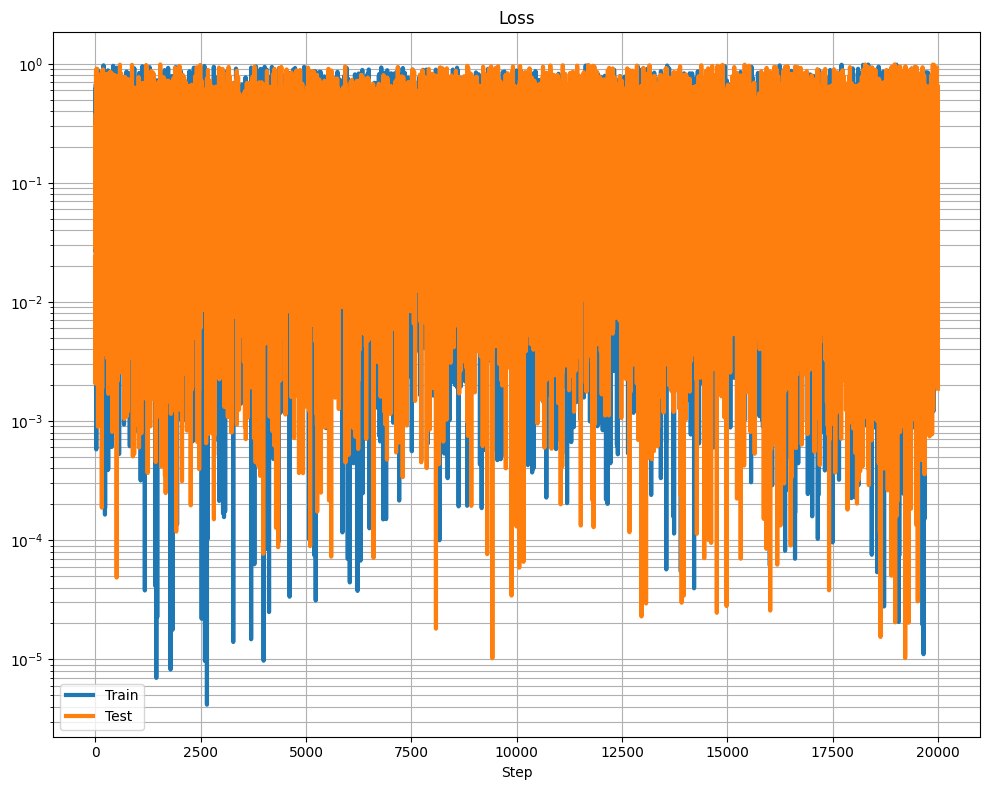

In [19]:
import matplotlib.pyplot as plt

fmt_train = {
    'color': 'tab:blue',
    'ls': 'solid',
    'lw': 3,
}
fmt_test = {
    'color': 'tab:orange',
    'ls': 'solid',
    'lw': 3,
}

fig, (ax) = plt.subplots(1,1,figsize=(10,8))

ax.semilogy(loss_train_l, label='Train', **fmt_train)
ax.semilogy(loss_test_l, label='Test', **fmt_test)

# bx.plot(accs_train, label='Train', **fmt_train)
# bx.plot(accs_test, label='Test', **fmt_test)

# bx.set_ylim(-0.01, 1.01)

ax.grid(which='both')
# bx.grid(which='both')

ax.legend()
# bx.legend()

ax.set_title('Loss')
# bx.set_title('Classifier Accuracy')

ax.set_xlabel('Step')
# bx.set_xlabel('Step')

fig.tight_layout()
plt.show()


Busco que presición tiene la Red Neuronal por medio de MLPClassifier con una taza de aprendizaje de 0.005 y 20000 iteraciones.

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Extraer variables de entrada (todas las filas, todas las columnas menos la última)
# Nota que deberíamos hacer algún escalado lineal aquí
X = df.drop(columns=['calidad']).values
# Extraer columna de salida (todas las filas, última columna)
Y = df['calidad'].values

# Normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Separar los datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3,  random_state=42)

# Crear el modelo
nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(11, 11),
                   activation='relu',
                   max_iter=20_000,
                   learning_rate_init=0.005,
                   )

# Entrenar el modelo
nn.fit(X_train, Y_train)

# Imprimir pesos y sesgos
#print(nn.coefs_)
#print(nn.intercepts_)

print("Puntaje del conjunto de entrenamiento: %f" % nn.score(X_train, Y_train))
print("Puntaje del conjunto de prueba: %f" % nn.score(X_test, Y_test))

Puntaje del conjunto de entrenamiento: 0.734522
Puntaje del conjunto de prueba: 0.596623
